In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table, join, vstack
from astropy import units as u

<Table length=1>
      name       dtype   shape            unit           format
--------------- ------- -------- ---------------------- -------
        SEGMENT  bytes4                                        
        EXPTIME float64                               s {:8.3f}
          NELEM   int32                                   {:6d}
     WAVELENGTH float64 (16384,)               Angstrom        
           FLUX float32 (16384,) erg / (Angstrom cm2 s)        
          ERROR float32 (16384,) erg / (Angstrom cm2 s)        
    ERROR_LOWER float32 (16384,)                 ct / s        
          GROSS float32 (16384,)                 ct / s        
        GCOUNTS float32 (16384,)                     ct        
  VARIANCE_FLAT float32 (16384,)                     ct        
VARIANCE_COUNTS float32 (16384,)                     ct        
   VARIANCE_BKG float32 (16384,)                     ct        
            NET float32 (16384,)                 ct / s        
     BACKGROUND float32

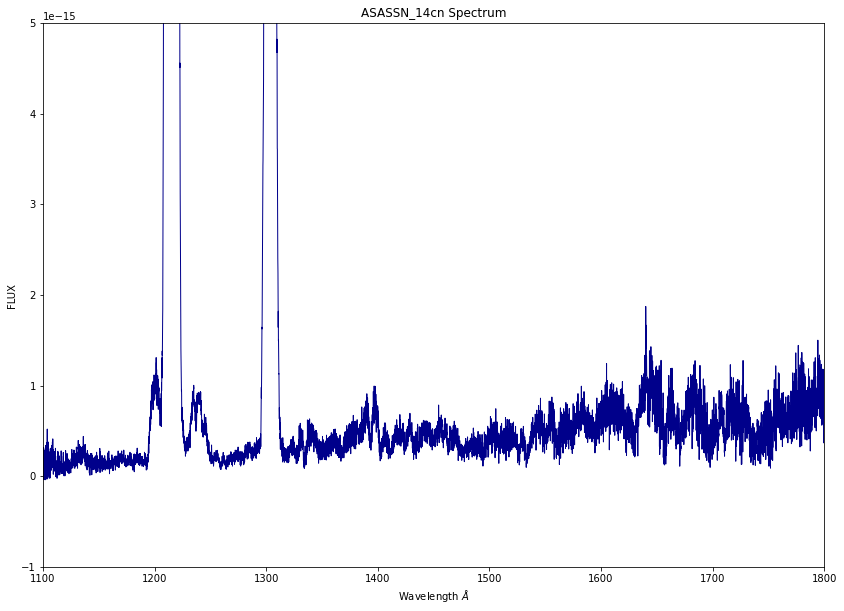

In [63]:
# ======================
# Read HST Spectrum Data
# ======================

# Select object
object_name = 'ASASSN_14cn' # <========== Enter here
'''
Select from:
1. YZ_LMi
2. ASASSN_14mv
3. GP_Com
4. KIC_4547333
5. ASASSN_14cn
'''
data_path = '../HST_DATA/'+object_name+'/'
#x1dsum = fits.open(data_path+'leqk33010_x1dsum.fits')
x1dsum = Table.read(data_path+'leqk40010_x1dsum.fits')

# Read Data Format
print(x1dsum.info(), '\n')
print(x1dsum.colnames, '\n')
print(x1dsum)

# Plot Spectrum
plt.figure(figsize=(14, 10))
plt.plot(x1dsum['WAVELENGTH'].T, x1dsum['FLUX'].T, ls='-', lw=1, c='darkblue')
plt.xlim(1100,1800)
plt.ylim(-1e-15, 5e-15) # <========= Adjust y-limit
'''
peak = 1304
plt.vlines(x=peak, ymin=0, ymax=2.8e-14, color='r', linestyle='--', linewidth=2)
plt.text(peak+2, 2.5e-14, s=('$\lambda$ = 1304'), fontsize=14, color='red')
'''
plt.xlabel('Wavelength $\AA$')
plt.ylabel('FLUX')
plt.title(object_name+' Spectrum')
plt.show()

In [71]:
# Save Spectrum in textfile

wavelength = np.asarray(x1dsum['WAVELENGTH'].T[:,0]) 
flux = np.asarray(x1dsum['FLUX'].T[:,0])
flux_error = np.asarray(x1dsum['ERROR'].T[:,0])
header = "WAVELENGTH, FLUX, ERROR"

with open('spectrum.txt', 'w') as f: 
    f.write(header + "\n")
    for wavelength,flux,flux_error in zip(wavelength,flux,flux_error): 
        f.write(f"{wavelength} {flux} {flux_error}\n")

! head asassn_14cn_spectrum.txt

Note for writing arrays into textfile

wavelength = np.asarray(file_name['WAVELENGTH'].T[:,0])
flux = np.asarray(file_name['FLUX'].T[:,0])

with open('testfile.txt', 'w') as f:
    for wave,flux in zip(wavelength,flux):
        f.write(f"{wave} {flux}\n")
        
! head testfile.txt

print(file_name['WAVELENGTH'].T[2])
print(file_name['WAVELENGTH'].T[:,0][2])
print(np.shape(file_name['WAVELENGTH'].T))
print(np.shape(file_name['WAVELENGTH'].T[:,0]))

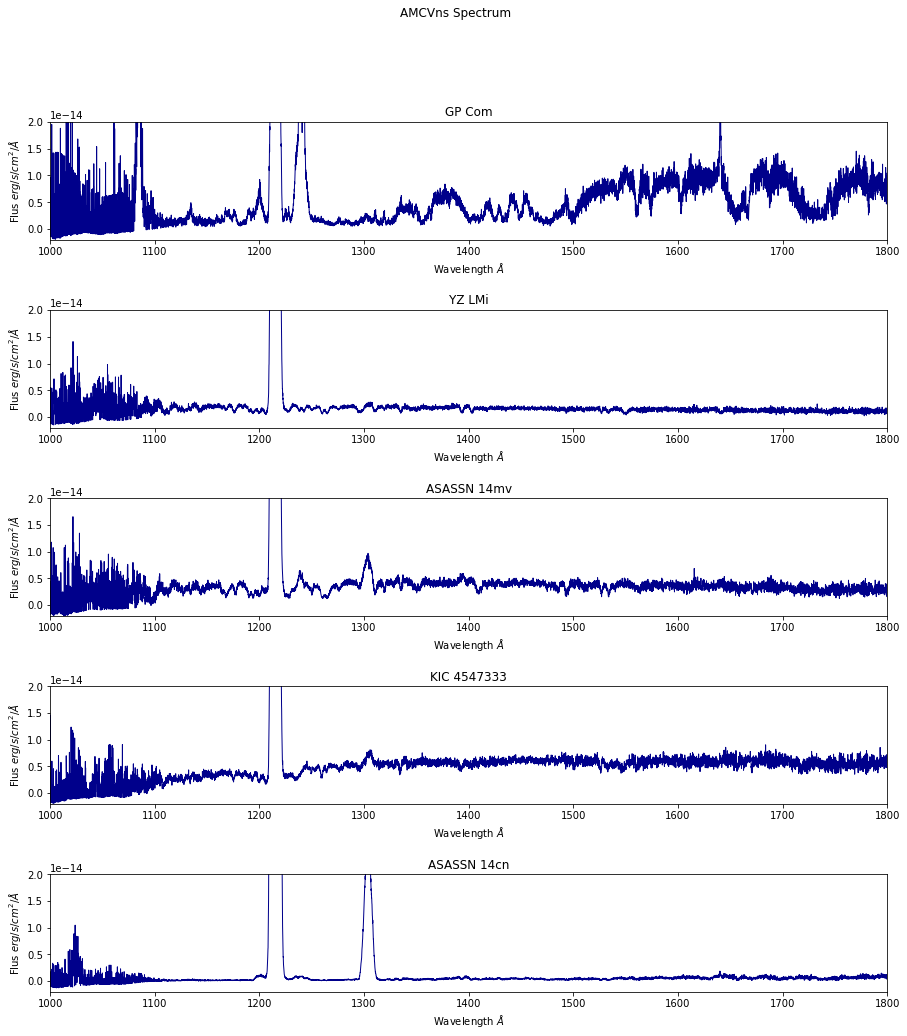

In [4]:
# ===================
# Spectrum Comparison
# ===================

# Import HST Datas
object_name = 'GP_Com'
data_path = '../HST_DATA/'+object_name+'/'
gp_x1dsum = Table.read(data_path+'leqk33010_x1dsum.fits')

object_name = 'YZ_LMi'
data_path = '../HST_DATA/'+object_name+'/'
yz_x1dsum = Table.read(data_path+'leqk35010_x1dsum.fits')

object_name = 'ASASSN_14mv'
data_path = '../HST_DATA/'+object_name+'/'
as_x1dsum = Table.read(data_path+'leqk37010_x1dsum.fits')

object_name = 'KIC_4547333'
data_path = '../HST_DATA/'+object_name+'/'
ki_x1dsum = Table.read(data_path+'leqk31010_x1dsum.fits')

object_name = 'ASASSN_14cn'
data_path = '../HST_DATA/'+object_name+'/'
cn_x1dsum = Table.read(data_path+'leqk40010_x1dsum.fits')

# Plot Spectrums
gp_spec = gp_x1dsum
yz_spec = yz_x1dsum
as_spec = as_x1dsum
ki_spec = ki_x1dsum
cn_spec = cn_x1dsum
specs = [gp_x1dsum, yz_x1dsum, as_x1dsum, ki_x1dsum, cn_x1dsum]
ob_num = len(specs)

fig, axs = plt.subplots(ob_num, figsize=(ob_num*3, 16),
                        gridspec_kw={'hspace': 0.6, 'wspace': 0.9})
fig.suptitle('AMCVns Spectrum')

for i in range(len(specs)):
    axs[i].plot(specs[i]['WAVELENGTH'].T, specs[i]['FLUX'].T, ls='-', lw=1, c='darkblue')
    
axs[0].set_title('GP Com')
axs[1].set_title('YZ LMi')
axs[2].set_title('ASASSN 14mv')
axs[3].set_title('KIC 4547333')
axs[4].set_title('ASASSN 14cn')
plt.setp(axs, xlim=(1000,1800), 
              ylim=(-2e-15, 2e-14))
plt.setp(axs, xlabel=('Wavelength $\AA$'),
              ylabel=('Flus $erg /s /cm^{2} /\AA$'))
plt.show()

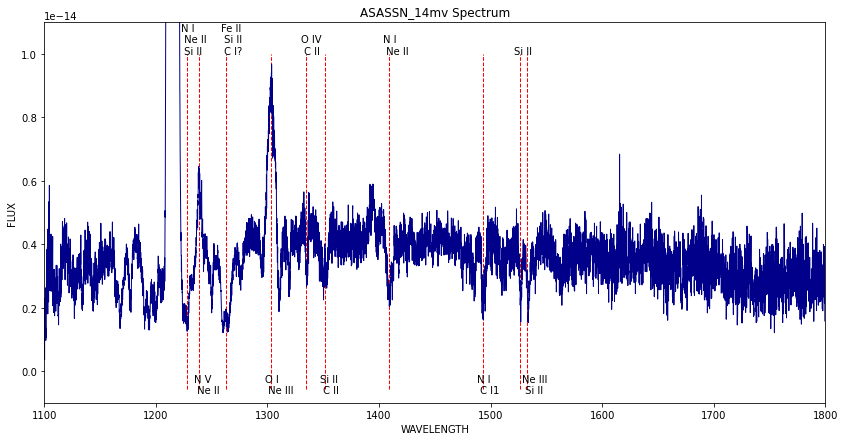

In [4]:
# =================
# Spectrum Analysis
# =================

# Import HST Spectrum
object_name = 'ASASSN_14mv'
data_path = '../HST_DATA/'+object_name+'/'
x1dsum = Table.read(data_path+'leqk37010_x1dsum.fits')

# Plot Spectrum
plt.figure(figsize=(14, 7))
plt.plot(x1dsum['WAVELENGTH'].T, x1dsum['FLUX'].T, ls='-', lw=1, c='darkblue')

# Identify Absorption Lines
ytxt_1 = 1e-14
ytxt_2 = -7e-16

w01 = 1228 #
plt.text(w01-5, ytxt_1, 'N I \n Ne II \n Si II')
w02 = 1239 # 
plt.text(w02-5, ytxt_2, 'N V \n Ne II')
w03 = 1263 # 
plt.text(w03-5, ytxt_1, 'Fe II \n Si II \n C I?')
w04 = 1303 # 
plt.text(w04-5, ytxt_2, 'O I \n Ne III')
w05 = 1335 # 
plt.text(w05-5, ytxt_1, 'O IV \n C II')
w06 = 1352 # 
plt.text(w06-5, ytxt_2, 'Si II \n C II')
w07 = 1409 # 
plt.text(w07-5, ytxt_1, 'N I \n Ne II')
w08 = 1493 # 
plt.text(w08-5, ytxt_2, 'N I \n C I1')
w09 = 1526 # 
plt.text(w09-5, ytxt_1, 'Si II')
w10 = 1533 # 
plt.text(w10-5, ytxt_2, 'Ne III \n Si II')

peaks = [w01, w02, w03, w04, w05, w06, w07, w08, w09, w10]
for pk in peaks:
    plt.vlines(x=pk, ymin = ytxt_2+1.2e-16, ymax = ytxt_1, 
               color='r', linestyle='--', linewidth=1)

plt.xlim(1100,1800)
plt.ylim(-1e-15, 1.1e-14)
plt.xlabel('WAVELENGTH')
plt.ylabel('FLUX')
plt.title(object_name+' Spectrum')
plt.show()

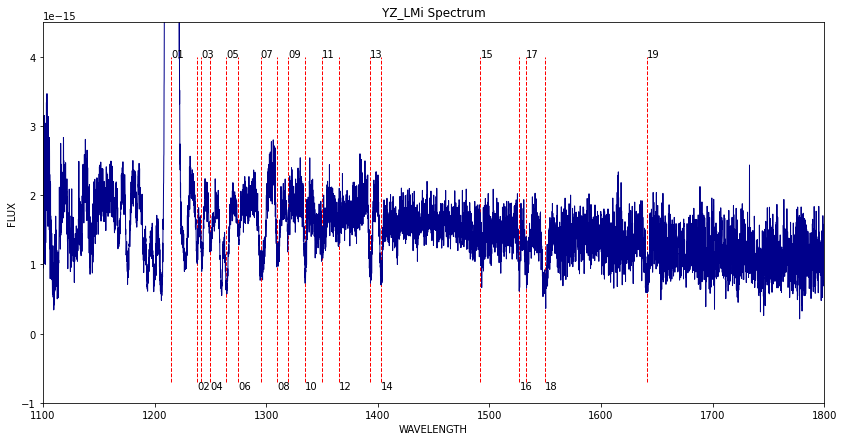

In [5]:
# =================
# Spectrum Analysis
# =================

# Import Spectrum
object_name = 'YZ_LMi'
data_path = '../HST_DATA/'+object_name+'/'
x1dsum = Table.read(data_path+'leqk35010_x1dsum.fits')

# Plot Spectrum
plt.figure(figsize=(14, 7))
plt.plot(x1dsum['WAVELENGTH'].T, x1dsum['FLUX'].T, ls='-', lw=1, c='darkblue')

# Identify Absorption Lines
ytxt_1 = 4e-15
ytxt_2 = -8e-16

w01 = 1215 # Lyman-alpha (1215.67)
plt.text(w01, ytxt_1, '01')
w02 = 1238 # Ne II (1239.018), N V (1238.821)
plt.text(w02, ytxt_2, '02')
w03 = 1242 # N V (1242.804), C I (1241-1245)
plt.text(w03, ytxt_1, '03')
w04 = 1250 # Si II (1246-1250), C I (1253)
plt.text(w04, ytxt_2, '04')
w05 = 1264 # Si II (1264.73), C I (1260-1268)
plt.text(w05, ytxt_1, '05')
w06 = 1275 # C I (1275.15)
plt.text(w06, ytxt_2, '06')
w07 = 1295 # Ne III (1295.57)
plt.text(w07, ytxt_1, '07')
w08 = 1310 # O I (1302-1306), Si II (1309.27), Ne III (1305), Ne III (1309), N I (1310), C I (1310-1313)
plt.text(w08, ytxt_2, '08')
w09 = 1320 # N I (1319.68)
plt.text(w09, ytxt_1, '09')
w10 = 1335 # O IV (1338-1343)
plt.text(w10, ytxt_2, '10')
w11 = 1350 # Si II (1350.06)
plt.text(w11, ytxt_1, '11')
w12 = 1365 # O V (1371.29), C I (1364)
plt.text(w12, ytxt_2, '12')
w13 = 1393 # Ne II or IV (1385-1400)
plt.text(w13, ytxt_1, '13')
w14 = 1403 # Ne II (1403.135)
plt.text(w14, ytxt_2, '14')
w15 = 1492 # Si II (1485.51), N I (1494), C I (1494)
plt.text(w15, ytxt_1, '15')
w16 = 1527 # Ne III (1522-1531)
plt.text(w16, ytxt_2, '16')
w17 = 1533 # Si (1533.45)
plt.text(w17, ytxt_1, '17')
w18 = 1550 # N V (1549.336)
plt.text(w18, ytxt_2, '18')
w19 = 1641 # O V (1643.68), Ne III (1639)
plt.text(w19, ytxt_1, '19')

# ==============================

peaks = [w01, w02, w03, w04, w05, w06, w07, w08, w09, w10, 
         w11, w12, w13, w14, w15, w16, w17, w18, w19]
for pk in peaks:
    plt.vlines(x=pk, ymin = ytxt_2+1e-16, ymax = ytxt_1, color='r', linestyle='--', linewidth=1)

plt.xlim(1100,1800)
plt.ylim(-1e-15, 4.5e-15)
plt.xlabel('WAVELENGTH')
plt.ylabel('FLUX')
plt.title(object_name+' Spectrum')
plt.show()

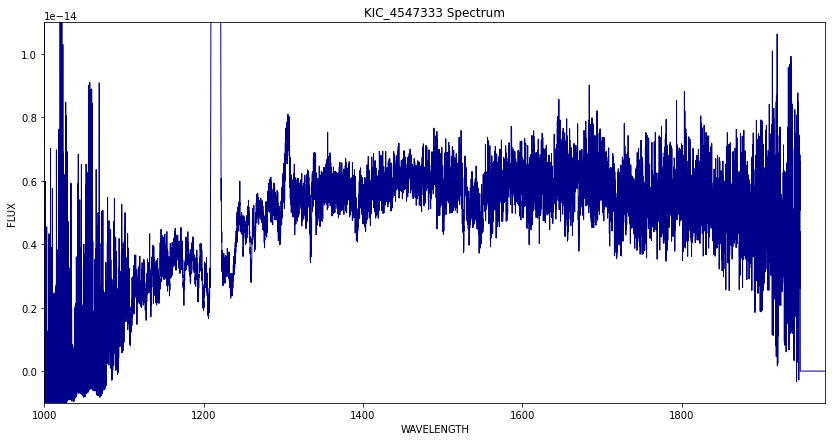

In [19]:
# =================
# Spectrum Analysis
# =================

# Import HST Spectrum
object_name = 'KIC_4547333'
data_path = '../HST_DATA/'+object_name+'/'
x1dsum = Table.read(data_path+'leqk31010_x1dsum.fits')

# Plot Spectrum
plt.figure(figsize=(14, 7))
plt.plot(x1dsum['WAVELENGTH'].T, x1dsum['FLUX'].T, ls='-', lw=1, c='darkblue')

# Identify Absorption Lines
ytxt_1 = 1e-14
ytxt_2 = -7e-16

'''
w01 = 1228 #
plt.text(w01-5, ytxt_1, 'N I \n Ne II \n Si II')
w02 = 1239 # 
plt.text(w02-5, ytxt_2, 'N V \n Ne II')
w03 = 1263 # 
plt.text(w03-5, ytxt_1, 'Fe II \n Si II \n C I?')
w04 = 1303 # 
plt.text(w04-5, ytxt_2, 'O I \n Ne III')
w05 = 1335 # 
plt.text(w05-5, ytxt_1, 'O IV \n C II')
w06 = 1352 # 
plt.text(w06-5, ytxt_2, 'Si II \n C II')
w07 = 1409 # 
plt.text(w07-5, ytxt_1, 'N I \n Ne II')
w08 = 1493 # 
plt.text(w08-5, ytxt_2, 'N I \n C I1')
w09 = 1526 # 
plt.text(w09-5, ytxt_1, 'Si II')
w10 = 1533 # 
plt.text(w10-5, ytxt_2, 'Ne III \n Si II')

peaks = [w01, w02, w03, w04, w05, w06, w07, w08, w09, w10]
for pk in peaks:
    plt.vlines(x=pk, ymin = ytxt_2+1.2e-16, ymax = ytxt_1, 
               color='r', linestyle='--', linewidth=1)
'''

plt.xlim(1000,1980)
plt.ylim(-1e-15, 1.1e-14)
plt.xlabel('WAVELENGTH')
plt.ylabel('FLUX')
plt.title(object_name+' Spectrum')
plt.show()